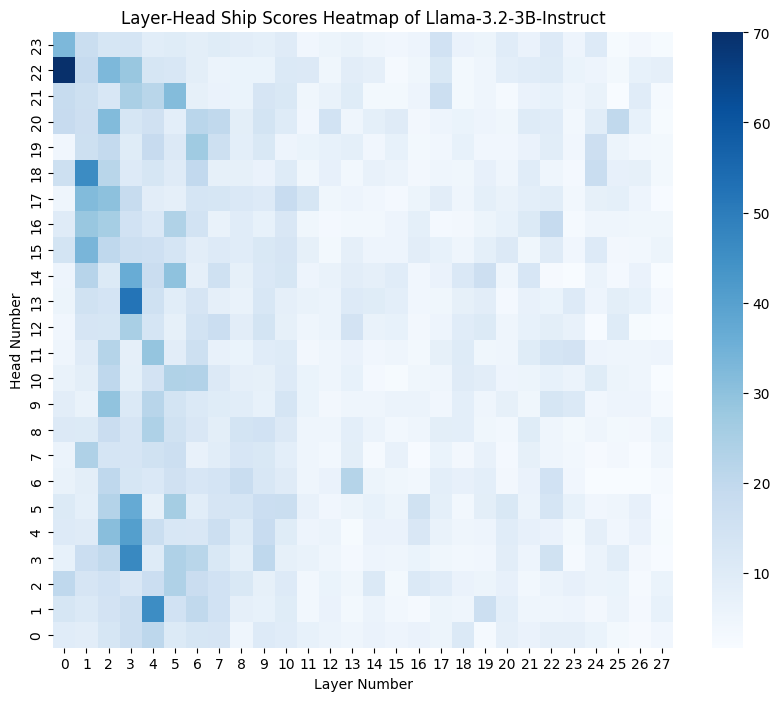

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_layer_head_heatmap(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    model_name = file_path.strip().split('/')[-2]

    layer_head_scores = {}
    max_layer = 0
    max_head = 0

    for key, value in data.items():
        layer, head = map(int, key.split('-'))
        layer_head_scores[(layer, head)] = value
        max_layer = max(max_layer, layer)
        max_head = max(max_head, head)
    score_matrix = np.zeros((max_head + 1, max_layer + 1))

    for (layer, head), score in layer_head_scores.items():
        score_matrix[head, layer] = score
    score_matrix = np.flipud(score_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        score_matrix, 
        annot=False, 
        cmap="Blues", 
        xticklabels=[f"{i}" for i in range(max_layer + 1)],
        yticklabels=[f"{i}" for i in range(max_head, -1, -1)]
    )
    plt.xlabel("Layer Number")
    plt.ylabel("Head Number")
    plt.title(f"Layer-Head Ship Scores Heatmap of {model_name}")
    plt.show()

plot_layer_head_heatmap('./exp_res/sahara/Llama-3.2-3B-Instruct/maliciousinstruct.csv_0.jsonl')
